# **Plots for Paper**

# Imports & Google Drive

In [1]:
!pip install scikit-bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 15.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.1 MB/s eta 0:00:00
  Created wheel for scikit-bio: filename=scikit_bio-0.5.8-cp310-cp310-linux_x86_64.whl size=2670776 sha256=b1e080e9b5a43046ae39f4eb155d030d04bfd563f352869119072e419b6a2128
  Stored in directory: /root/.cache/pip/wheels/e8/5c/a6/323c02049541684538df2610cc63f0157ecb8995cac53667d3
  Created wheel for hdmedians: filename=hdmedians-0.14.2-cp310-cp310-linux_x86_64.whl size=672976 sha256=85d596f884ea1c87ebda9835854405fc132147409e1b87

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from google.colab import drive
from pathlib import Path
import os

from skbio.diversity.alpha import chao1, ace

In [3]:
drive.mount('/content/drive')
!ls
PATH = "/content/drive/MyDrive/Data_Science/Thesis/SONIA_data"
os.chdir(PATH)

Mounted at /content/drive
drive  sample_data


In [4]:
pwd

'/content/drive/MyDrive/Data_Science/Thesis/SONIA_data'

# Rarefaction & Clonotype Plots

## Sonia & TCRdb

In [ ]:
# TCRdb = Orange
# SONIA1 = Blue
# SONIA2 = Green

In [5]:
# reading in the species richnesss data
unique_tcr = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique_tcr.csv', sep='\t', header=None)
unique_sonia1 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique_df1.csv', sep='\t', header=None)
unique_sonia2 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique_df2.csv', sep='\t', header=None)

In [6]:
# reading in the clonotype data
clone_tcr = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_tcr.tsv', sep='\t', header=None)
clone_tcr.columns = ['x', 'y']
clone_sonia1 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_1all.tsv', sep='\t', header=None)
clone_sonia1.columns = ['x', 'y']
clone_sonia2 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_2all.tsv', sep='\t', header=None)
clone_sonia2.columns = ['x', 'y']

In [ ]:
unique_sonia2[0][18999]

852972.0

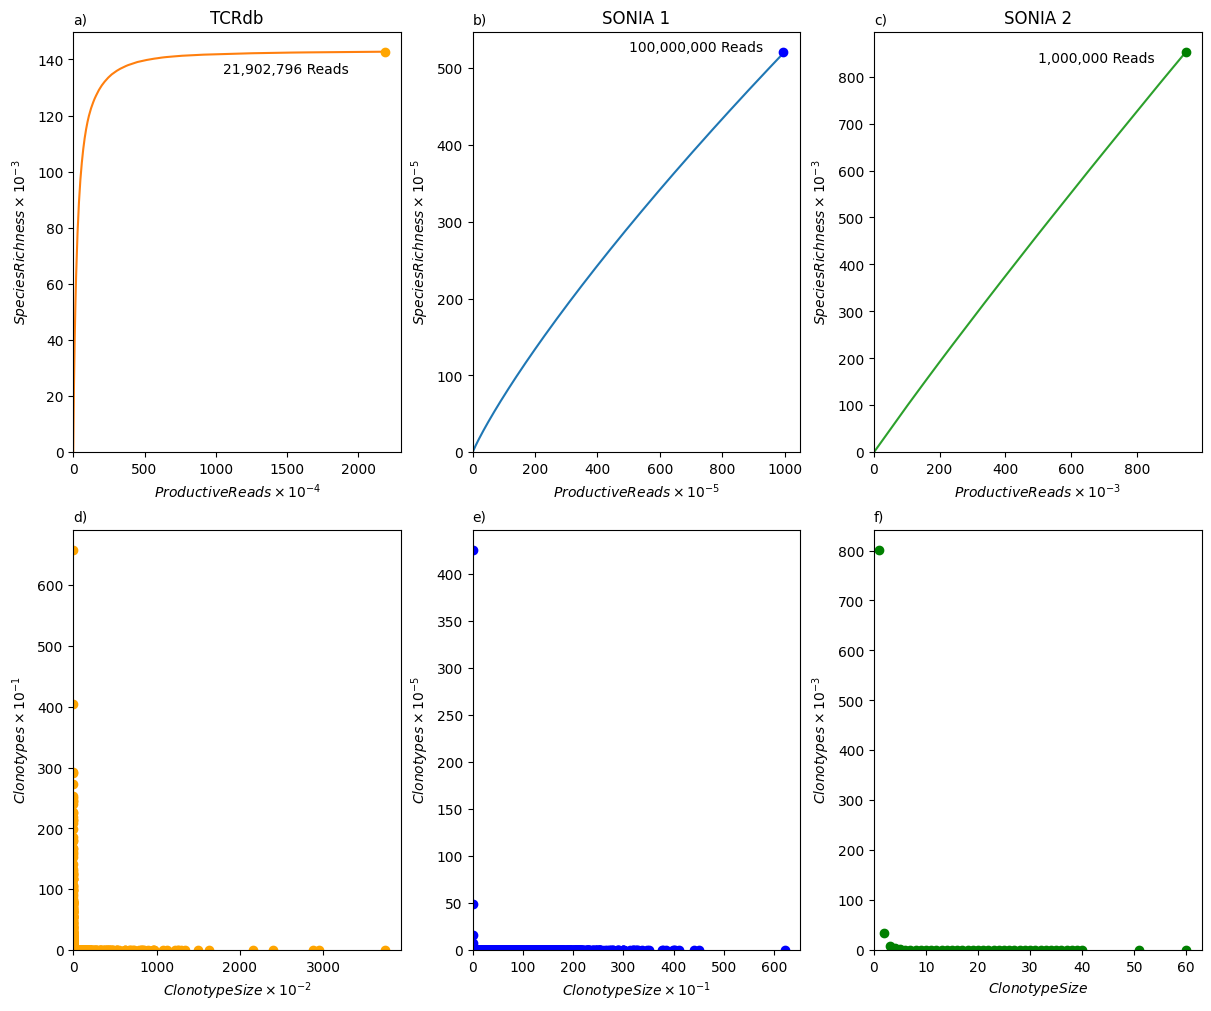

In [ ]:
fig, axs = plt.subplots(2, 3, figsize = (12, 10), constrained_layout = True) # sharex=True, sharey=True

# tcr
x_tcr = list(range(1, 50000*(len(unique_tcr)), 50000))
x_tcr = [i + 50000 for i in x_tcr]
x_tcr.insert(0, 0)
x_tcr = [i *10**-4 for i in x_tcr]
y_tcr = list(unique_tcr[0]*10**-3)
y_tcr.insert(0, 0)
axs[0, 0].plot(x_tcr, y_tcr, 'tab:orange')
axs[0,0].plot(21850001*10**-4, unique_tcr[0][437]*10**-3, marker='o', color='orange')
axs[0, 0].text(10500000*10**-4, 135000*10**-3, '21,902,796 Reads')
axs[0, 0].set_xlim(0)
axs[0, 0].set_ylim(0)
axs[0, 0].set_title('a)', loc='left', fontsize='medium')
axs[0, 0].set_title('TCRdb')
axs[0, 0].set(ylabel=r'$Species Richness \times 10^{-3}$', xlabel=r'$Productive Reads \times 10^{-4}$')
# SONIA1
x_sonia1 = list(range(1, 500000*(len(unique_sonia1)), 500000))
x_sonia1 = [i + 500000 for i in x_sonia1]
x_sonia1.insert(0, 0)
x_sonia1 = [i *10**-5 for i in x_sonia1]
y_sonia1 = list(unique_sonia1[0]*10**-5)
y_sonia1.insert(0, 0)
axs[0, 1].plot(x_sonia1, y_sonia1, 'tab:blue')
axs[0, 1].plot(99500001*10**-5, unique_sonia1[0][199]*10**-5, marker='o', color='blue')
axs[0, 1].text(50000000*10**-5, unique_sonia1[0][199]*10**-5, '100,000,000 Reads')
axs[0, 1].set_title('SONIA 1')
axs[0, 1].set(ylabel=r'$Species Richness \times 10^{-5}$', xlabel=r'$Productive Reads \times 10^{-5}$')
axs[0, 1].set_xlim(0)
axs[0, 1].set_ylim(0)
axs[0, 1].set_title('b)', loc='left', fontsize='medium')
# SONIA2
x_sonia2 = list(range(1, 50*(len(unique_sonia2)), 50))
x_sonia2 = [i + 50 for i in x_sonia2]
x_sonia2.insert(0, 0)
x_sonia2 = [i *10**-3 for i in x_sonia2]
y_sonia2 = list(unique_sonia2[0]*10**-3)
y_sonia2.insert(0, 0)
axs[0, 2].plot(x_sonia2, y_sonia2, 'tab:green')
axs[0, 2].plot(949951*10**-3, unique_sonia2[0][18999]*10**-3, marker='o', color='green')
axs[0, 2].text(500000*10**-3, 830000*10**-3, '1,000,000 Reads')
axs[0, 2].set_title('SONIA 2')
axs[0, 2].set(ylabel=r'$Species Richness \times 10^{-3}$', xlabel=r'$Productive Reads \times 10^{-3}$')
axs[0, 2].set_xlim(0)
axs[0, 2].set_ylim(0)
axs[0, 2].set_title('c)', loc='left', fontsize='medium')


# Row 2: Clonotype
axs[1, 0].scatter(x=clone_tcr['x']*10**-2, y=clone_tcr['y']*10**-1, c='orange')
axs[1, 0].set(ylabel=r'$Clonotypes \times 10^{-1}$', xlabel=r'$Clonotype Size \times 10^{-2}$')
axs[1, 0].set_xlim(0)
axs[1, 0].set_ylim(0)
axs[1, 0].set_title('d)', loc='left', fontsize='medium')

# axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].scatter(x=clone_sonia1['x']*10**-1, y=clone_sonia1['y']*10**-5, c='blue')
axs[1, 1].set(ylabel=r'$Clonotypes \times 10^{-5}$', xlabel=r'$Clonotype Size \times 10^{-1}$')
axs[1, 1].set_xlim(0)
axs[1, 1].set_ylim(0)
axs[1, 1].set_title('e)', loc='left', fontsize='medium')

axs[1, 2].scatter(x=clone_sonia2['x'], y=clone_sonia2['y']*10**-3, c='green')
axs[1, 2].set(ylabel=r'$Clonotypes \times 10^{-3}$', xlabel=r'$Clonotype Size$')
axs[1, 2].set_xlim(0)
axs[1, 2].set_ylim(0)
axs[1, 2].set_title('f)', loc='left', fontsize='medium')

plt.savefig('clone_tcr_sonia.png', dpi=300)

## Uniform Distribution 1

In [ ]:
# reading in the species richnesss data
unique_s10_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique_s10_000.csv', sep='\t', header=None)
unique_s100_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique_s100_000.csv', sep='\t', header=None)
unique_s1_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique_s1_000_000.csv', sep='\t', header=None)
unique_s3_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique_s3_000_000.csv', sep='\t', header=None)

In [ ]:
# reading in the clonotype data
clone_10_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_unif_10_000.tsv', sep='\t', header=None)
clone_10_000.columns = ['x', 'y']
clone_100_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_unif_100_000.tsv', sep='\t', header=None)
clone_100_000.columns = ['x', 'y']
clone_1_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_unif_1_000_000.tsv', sep='\t', header=None)
clone_1_000_000.columns = ['x', 'y']
clone_3_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_unif_3_000_000.tsv', sep='\t', header=None)
clone_3_000_000.columns = ['x', 'y']


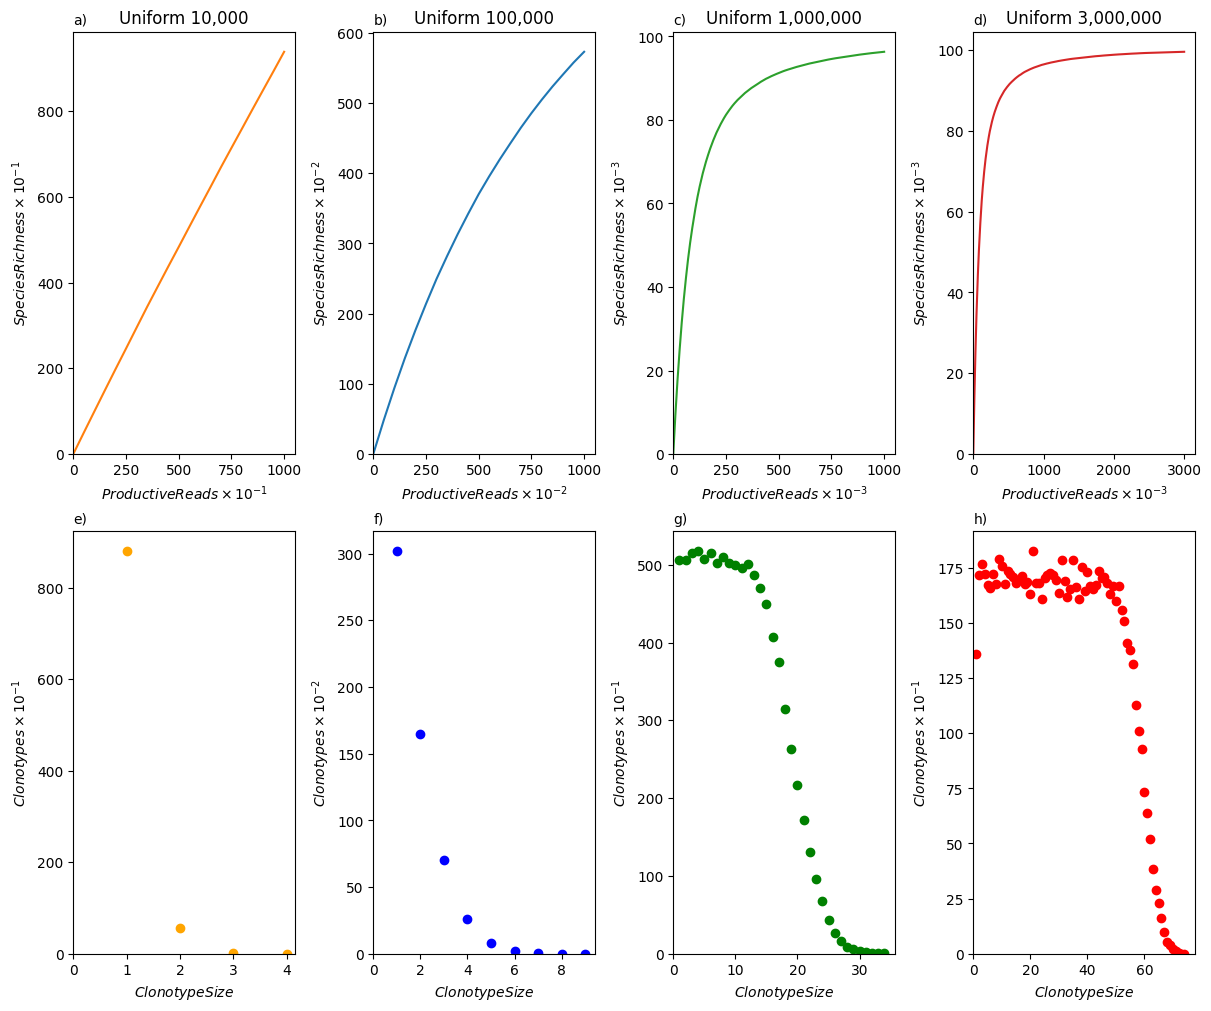

In [ ]:
fig, axs = plt.subplots(2, 4, figsize = (12, 10), constrained_layout = True) # sharex=True, sharey=True

# 10,000
x_u1 = list(range(1, 500*(len(unique_s10_000)), 500))
x_u1 = [i + 500 for i in x_u1]
x_u1.insert(0, 0)
x_u1 = [i *10**-1 for i in x_u1]
y_u1 = list(unique_s10_000[0]*10**-1)
y_u1.insert(0, 0)
axs[0, 0].plot(x_u1, y_u1, 'tab:orange')
axs[0, 0].set_title('Uniform 10,000')
axs[0, 0].set(xlabel=r'$Productive Reads \times 10^{-1}$', ylabel=r'$Species Richness \times 10^{-1}$')
axs[0, 0].set_xlim(0)
axs[0, 0].set_ylim(0)
axs[0, 0].set_title('a)', loc='left', fontsize='medium')
# 100,000
x_u2 = list(range(1, 5000*(len(unique_s100_000)), 5000))
x_u2 = [i + 5000 for i in x_u2]
x_u2.insert(0, 0)
x_u2 = [i *10**-2 for i in x_u2]
y_u2 = list(unique_s100_000[0]*10**-2)
y_u2.insert(0, 0)
axs[0, 1].plot(x_u2, y_u2, 'tab:blue')
axs[0, 1].set_title('Uniform 100,000')
axs[0, 1].set(xlabel=r'$Productive Reads \times 10^{-2}$', ylabel=r'$Species Richness \times 10^{-2}$')
axs[0, 1].set_xlim(0)
axs[0, 1].set_ylim(0)
axs[0, 1].set_title('b)', loc='left', fontsize='medium')
# 1,000,000
x_u3 = list(range(1, 5000*(len(unique_s1_000_000)), 5000))
x_u3 = [i + 5000 for i in x_u3]
x_u3.insert(0, 0)
x_u3 = [i *10**-3 for i in x_u3]
y_u3 = list(unique_s1_000_000[0]*10**-3)
y_u3.insert(0, 0)
axs[0, 2].plot(x_u3, y_u3, 'tab:green')
axs[0, 2].set_title('Uniform 1,000,000')
axs[0, 2].set(xlabel=r'$Productive Reads \times 10^{-3}$', ylabel=r'$Species Richness \times 10^{-3}$')
axs[0, 2].set_xlim(0)
axs[0, 2].set_ylim(0)
axs[0, 2].set_title('c)', loc='left', fontsize='medium')
# 3,000,000
x_u4 = list(range(1, 5000*(len(unique_s3_000_000)), 5000))
x_u4 = [i + 5000 for i in x_u4]
x_u4.insert(0, 0)
x_u4 = [i *10**-3 for i in x_u4]
y_u4 = list(unique_s3_000_000[0]*10**-3)
y_u4.insert(0, 0)
axs[0, 3].plot(x_u4, y_u4, 'tab:red')
axs[0, 3].set_title('Uniform 3,000,000')
axs[0, 3].set(xlabel=r'$Productive Reads \times 10^{-3}$', ylabel=r'$Species Richness \times 10^{-3}$')
axs[0, 3].set_xlim(0)
axs[0, 3].set_ylim(0)
axs[0, 3].set_title('d)', loc='left', fontsize='medium')

# Row 2: Clonotype
axs[1, 0].scatter(x=clone_10_000['x'], y=clone_10_000['y']*10**-1, c='orange')
axs[1, 0].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-1}$')
axs[1, 0].set_xlim(0)
axs[1, 0].set_ylim(0)
axs[1, 0].set_title('e)', loc='left', fontsize='medium')
axs[1, 1].scatter(x=clone_100_000['x'], y=clone_100_000['y']*10**-2, c='blue')
axs[1, 1].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-2}$')
axs[1, 1].set_xlim(0)
axs[1, 1].set_ylim(0)
axs[1, 1].set_title('f)', loc='left', fontsize='medium')
axs[1, 2].scatter(x=clone_1_000_000['x'], y=clone_1_000_000['y']*10**-1, c='green')
axs[1, 2].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-1}$')
axs[1, 2].set_xlim(0)
axs[1, 2].set_ylim(0)
axs[1, 2].set_title('g)', loc='left', fontsize='medium')
axs[1, 3].scatter(x=clone_3_000_000['x'], y=clone_3_000_000['y']*10**-1, c='red')
axs[1, 3].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-1}$')
axs[1, 3].set_xlim(0)
axs[1, 3].set_ylim(0)
axs[1, 3].set_title('h)', loc='left', fontsize='medium')

plt.savefig('clone_unif1.png', dpi=300)

## Mixed Poisson Distribution 1

In [ ]:
# reading in the species richnesss data
mp_s10_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique_s10_000.csv', sep='\t', header=None)
mp_s100_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique_s1_000_000.csv', sep='\t', header=None)
mp_s300_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique_s3_000_000.csv', sep='\t', header=None)


In [ ]:
# reading in the clonotype data
mp_clone_10_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_mp_10000.tsv', sep='\t', header=None)
mp_clone_10_000.columns = ['x', 'y']
mp_clone_100_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_mp_100000.tsv', sep='\t', header=None)
mp_clone_100_000.columns = ['x', 'y']
mp_clone_300_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_mp_300000.tsv', sep='\t', header=None)
mp_clone_300_000.columns = ['x', 'y']

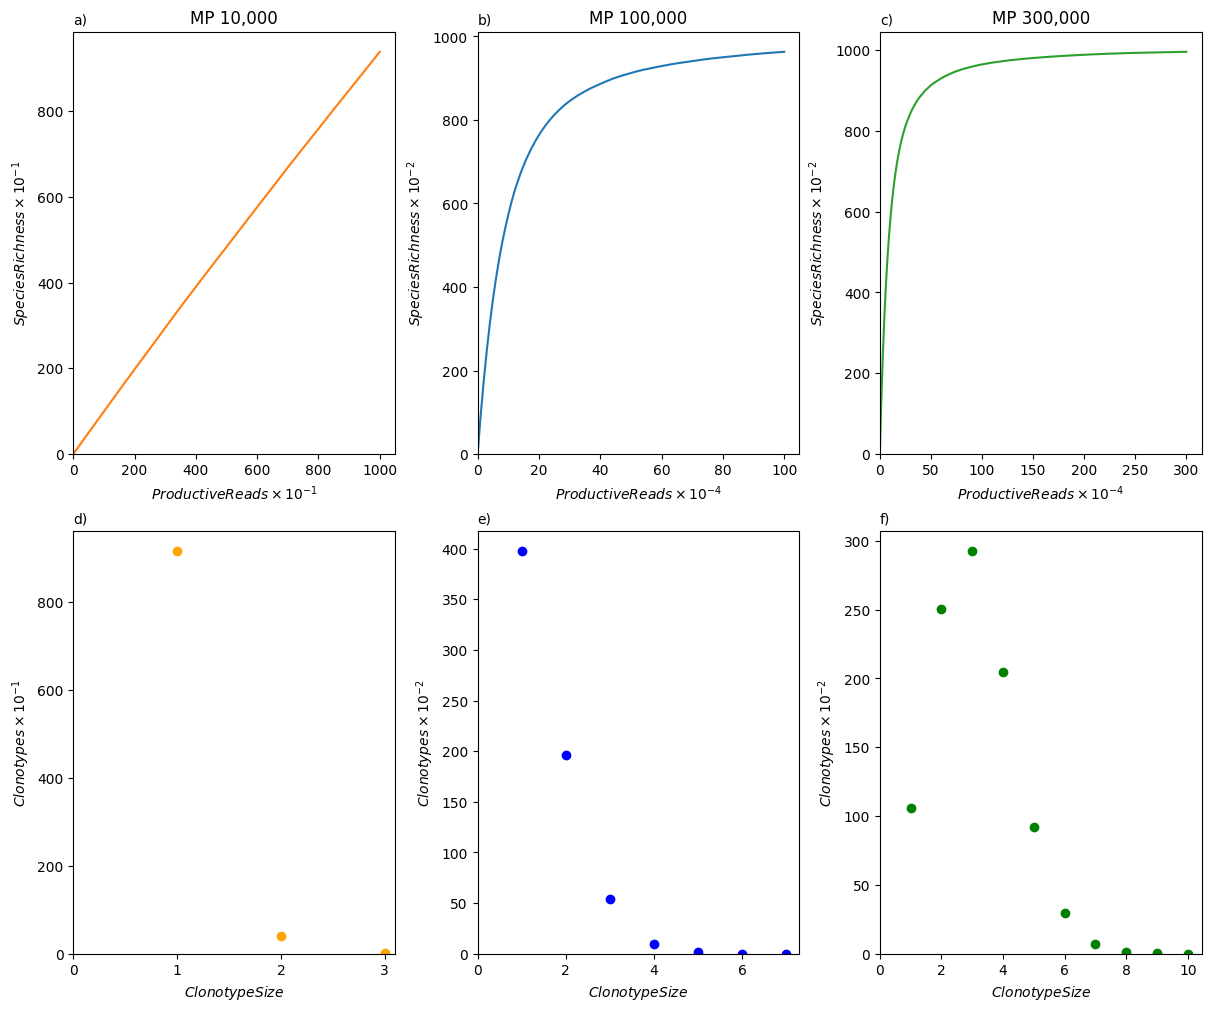

In [ ]:
fig, axs = plt.subplots(2, 3, figsize = (12, 10), constrained_layout = True) # sharex=True, sharey=True

# 10,000
x_m1 = list(range(1, 500*(len(mp_s10_000)), 500))
x_m1 = [i + 500 for i in x_m1]
x_m1.insert(0, 0)
x_m1 = [i *10**-1 for i in x_m1]
y_m1 = list(mp_s10_000[0]*10**-1)
y_m1.insert(0, 0)
axs[0, 0].plot(x_m1, y_m1, 'tab:orange')
axs[0, 0].set_title('MP 10,000')
axs[0, 0].set(xlabel=r'$Productive Reads \times 10^{-1}$', ylabel=r'$Species Richness \times 10^{-1}$')
axs[0, 0].set_xlim(0)
axs[0, 0].set_ylim(0)
axs[0, 0].set_title('a)', loc='left', fontsize='medium')
# 100,000
x_m2 = list(range(1, 5000*(len(mp_s100_000)), 5000))
x_m2 = [i + 5000 for i in x_m2]
x_m2.insert(0, 0)
x_m2 = [i *10**-4 for i in x_m2]
y_m2 = list(mp_s100_000[0]*10**-2)
y_m2.insert(0, 0)
axs[0, 1].plot(x_m2, y_m2, 'tab:blue')
axs[0, 1].set_title('MP 100,000')
axs[0, 1].set(xlabel=r'$Productive Reads \times 10^{-4}$', ylabel=r'$Species Richness \times 10^{-2}$')
axs[0, 1].set_xlim(0)
axs[0, 1].set_ylim(0)
axs[0, 1].set_title('b)', loc='left', fontsize='medium')
# 1,000,000
x_m3 = list(range(1, 5000*(len(mp_s300_000)), 5000))
x_m3 = [i + 5000 for i in x_m3]
x_m3.insert(0, 0)
x_m3 = [i *10**-4 for i in x_m3]
y_m3 = list(mp_s300_000[0]*10**-2)
y_m3.insert(0, 0)
axs[0, 2].plot(x_m3, y_m3, 'tab:green')
axs[0, 2].set_title('MP 300,000')
axs[0, 2].set(xlabel=r'$Productive Reads \times 10^{-4}$', ylabel=r'$Species Richness \times 10^{-2}$')
axs[0, 2].set_xlim(0)
axs[0, 2].set_ylim(0)
axs[0, 2].set_title('c)', loc='left', fontsize='medium')

# Row 2: Clonotype
axs[1, 0].scatter(x=mp_clone_10_000['x'], y=mp_clone_10_000['y']*10**-1, c='orange')
axs[1, 0].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-1}$', xticks=[0, 1, 2, 3])
axs[1, 0].set_xlim(0)
axs[1, 0].set_ylim(0)
axs[1, 0].set_title('d)', loc='left', fontsize='medium')
axs[1, 1].scatter(x=mp_clone_100_000['x'], y=mp_clone_100_000['y']*10**-2, c='blue')
axs[1, 1].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-2}$')
axs[1, 1].set_xlim(0)
axs[1, 1].set_ylim(0)
axs[1, 1].set_title('e)', loc='left', fontsize='medium')
axs[1, 2].scatter(x=mp_clone_300_000['x'], y=mp_clone_300_000['y']*10**-2, c='green')
axs[1, 2].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-2}$')
axs[1, 2].set_xlim(0)
axs[1, 2].set_ylim(0)
axs[1, 2].set_title('f)', loc='left', fontsize='medium')

plt.savefig('clone_mp1.png', dpi=300)

## Uniform Distribution 2

In [7]:
# reading in the species richnesss data
unique2_s10_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique1_s10_000.csv', sep='\t', header=None)
unique2_s100_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique1_s100_000.csv', sep='\t', header=None)
unique2_s1_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique1_s1_000_000.csv', sep='\t', header=None)
unique2_s3_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique1_s3_000_000.csv', sep='\t', header=None)
unique2_s10_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique1_s10_000_000.csv', sep='\t', header=None)
unique2_s20_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique1_s20_000_000.csv', sep='\t', header=None)
unique2_s30_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique1_s30_000_000.csv', sep='\t', header=None)
unique2_s40_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique1_s40_000_000.csv', sep='\t', header=None)

# reading in the clonotype data
clone2_10_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_unif1_10_000.tsv', sep='\t', header=None)
clone2_10_000.columns = ['x', 'y']
clone2_100_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_unif1_100_000.tsv', sep='\t', header=None)
clone2_100_000.columns = ['x', 'y']
clone2_1_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_unif1_1_000_000.tsv', sep='\t', header=None)
clone2_1_000_000.columns = ['x', 'y']
clone2_3_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_unif1_3_000_000.tsv', sep='\t', header=None)
clone2_3_000_000.columns = ['x', 'y']
clone2_10_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_unif1_10_000_000.tsv', sep='\t', header=None)
clone2_10_000_000.columns = ['x', 'y']
clone2_20_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_unif1_20_000_000.tsv', sep='\t', header=None)
clone2_20_000_000.columns = ['x', 'y']
clone2_30_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_unif1_30_000_000.tsv', sep='\t', header=None)
clone2_30_000_000.columns = ['x', 'y']
clone2_40_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_unif1_40_000_000.tsv', sep='\t', header=None)
clone2_40_000_000.columns = ['x', 'y']


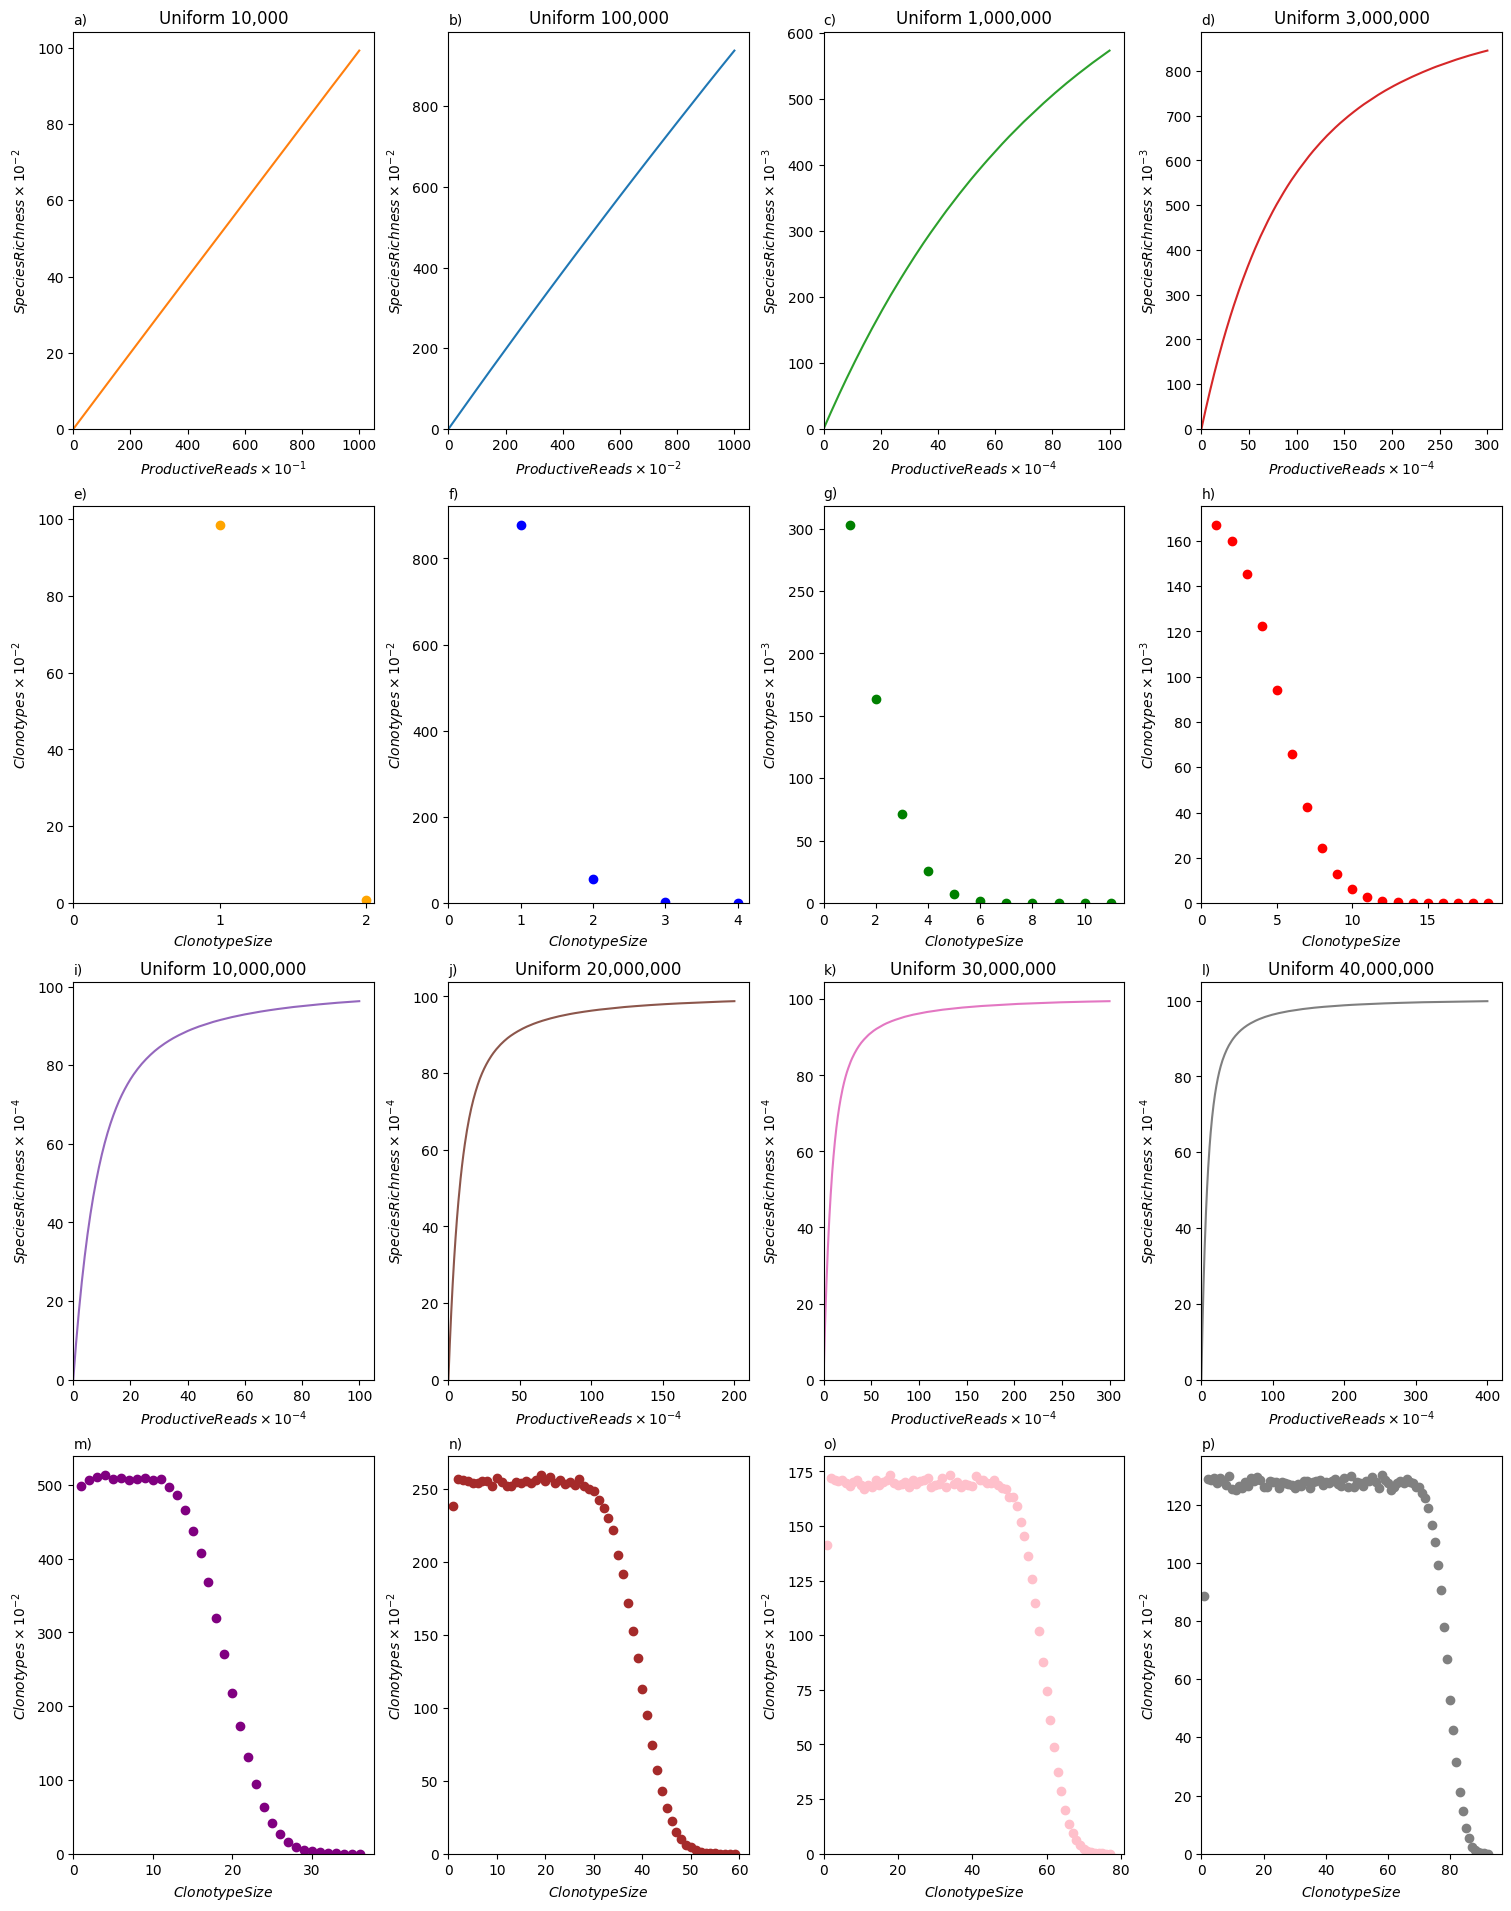

In [10]:
fig, axs = plt.subplots(4, 4, figsize = (15, 19), constrained_layout=True) # sharex=True, sharey=True

# Row 1: Rarefaction
x_u1_1 = list(range(0, 500*(len(unique2_s10_000)), 500))
x_u1_1 = [i + 500 for i in x_u1_1]
x_u1_1.insert(0, 0)
x_u1_1 = [i *10**-1 for i in x_u1_1]
y_u1_1 = list(unique2_s10_000[0]*10**-2)
y_u1_1.insert(0, 0)
axs[0, 0].plot(x_u1_1, y_u1_1, 'tab:orange')
axs[0, 0].set_title('Uniform 10,000')
axs[0, 0].set(xlabel=r'$Productive Reads \times 10^{-1}$', ylabel=r'$Species Richness \times 10^{-2}$')
axs[0, 0].set_xlim(0)
axs[0, 0].set_ylim(0)
axs[0, 0].set_title('a)', loc='left', fontsize='medium')
# 100,000
x_u1_2 = list(range(1, 5000*(len(unique2_s100_000)), 5000))
x_u1_2 = [i + 5000 for i in x_u1_2]
x_u1_2.insert(0, 0)
x_u1_2 = [i *10**-2 for i in x_u1_2]
y_u1_2 = list(unique2_s100_000[0]*10**-2)
y_u1_2.insert(0, 0)
axs[0, 1].plot(x_u1_2, y_u1_2, 'tab:blue')
axs[0, 1].set_title('Uniform 100,000')
axs[0, 1].set(xlabel=r'$Productive Reads \times 10^{-2}$', ylabel=r'$Species Richness \times 10^{-2}$')
axs[0, 1].set_xlim(0)
axs[0, 1].set_ylim(0)
axs[0, 1].set_title('b)', loc='left', fontsize='medium')
# 1,000,000
x_u1_3 = list(range(1, 5000*(len(unique2_s1_000_000)), 5000))
x_u1_3 = [i + 5000 for i in x_u1_3]
x_u1_3.insert(0, 0)
x_u1_3 = [i *10**-4 for i in x_u1_3]
y_u1_3 = list(unique2_s1_000_000[0]*10**-3)
y_u1_3.insert(0, 0)
axs[0, 2].plot(x_u1_3, y_u1_3, 'tab:green')
axs[0, 2].set_title('Uniform 1,000,000')
axs[0, 2].set(xlabel=r'$Productive Reads \times 10^{-4}$', ylabel=r'$Species Richness \times 10^{-3}$')
axs[0, 2].set_xlim(0)
axs[0, 2].set_ylim(0)
axs[0, 2].set_title('c)', loc='left', fontsize='medium')
# 3,000,000
x_u1_4 = list(range(1, 5000*(len(unique2_s3_000_000)), 5000))
x_u1_4 = [i + 5000 for i in x_u1_4]
x_u1_4.insert(0, 0)
x_u1_4 = [i *10**-4 for i in x_u1_4]
y_u1_4 = list(unique2_s3_000_000[0]*10**-3)
y_u1_4.insert(0, 0)
axs[0, 3].plot(x_u1_4, y_u1_4, 'tab:red')
axs[0, 3].set_title('Uniform 3,000,000')
axs[0, 3].set(xlabel=r'$Productive Reads \times 10^{-4}$', ylabel=r'$Species Richness \times 10^{-3}$')
axs[0, 3].set_xlim(0)
axs[0, 3].set_ylim(0)
axs[0, 3].set_title('d)', loc='left', fontsize='medium')

# Row 2: Clonotype
axs[1, 0].scatter(x=clone2_10_000['x'], y=clone2_10_000['y']*10**-2, c='orange')
axs[1, 0].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-2}$', xticks=[0, 1, 2])
axs[1, 0].set_xlim(0)
axs[1, 0].set_ylim(0)
axs[1, 0].set_title('e)', loc='left', fontsize='medium')
axs[1, 1].scatter(x=clone2_100_000['x'], y=clone2_100_000['y']*10**-2, c='blue')
axs[1, 1].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-2}$')
axs[1, 1].set_xlim(0)
axs[1, 1].set_ylim(0)
axs[1, 1].set_title('f)', loc='left', fontsize='medium')
axs[1, 2].scatter(x=clone2_1_000_000['x'], y=clone2_1_000_000['y']*10**-3, c='green')
axs[1, 2].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-3}$')
axs[1, 2].set_xlim(0)
axs[1, 2].set_ylim(0)
axs[1, 2].set_title('g)', loc='left', fontsize='medium')
axs[1, 3].scatter(x=clone2_3_000_000['x'], y=clone2_3_000_000['y']*10**-3, c='red')
axs[1, 3].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-3}$')
axs[1, 3].set_xlim(0)
axs[1, 3].set_ylim(0)
axs[1, 3].set_title('h)', loc='left', fontsize='medium')

# Row 3: Rarefaction
# 10 million
x_u1_5 = list(range(1, 5000*(len(unique2_s10_000_000)), 5000))
x_u1_5 = [i + 5000 for i in x_u1_5]
x_u1_5.insert(0, 0)
x_u1_5 = [i *10**-4 for i in x_u1_5]
y_u1_5 = list(unique2_s10_000_000[0]*10**-4)
y_u1_5.insert(0, 0)
axs[2, 0].plot(x_u1_5, y_u1_5, 'tab:purple')
axs[2, 0].set_title('Uniform 10,000,000')
axs[2, 0].set(xlabel=r'$Productive Reads \times 10^{-4}$', ylabel=r'$Species Richness \times 10^{-4}$')
axs[2, 0].set_xlim(0)
axs[2, 0].set_ylim(0)
axs[2, 0].set_title('i)', loc='left', fontsize='medium')
# 20 million
x_u1_6 = list(range(1, 5000*(len(unique2_s20_000_000)), 5000))
x_u1_6 = [i + 5000 for i in x_u1_6]
x_u1_6.insert(0, 0)
x_u1_6 = [i *10**-4 for i in x_u1_6]
y_u1_6 = list(unique2_s20_000_000[0]*10**-4)
y_u1_6.insert(0, 0)
axs[2, 1].plot(x_u1_6, y_u1_6, 'tab:brown')
axs[2, 1].set_title('Uniform 20,000,000')
axs[2, 1].set(xlabel=r'$Productive Reads \times 10^{-4}$', ylabel=r'$Species Richness \times 10^{-4}$')
axs[2, 1].set_xlim(0)
axs[2, 1].set_ylim(0)
axs[2, 1].set_title('j)', loc='left', fontsize='medium')
# 30 million
x_u1_7 = list(range(1, 5000*(len(unique2_s30_000_000)), 5000))
x_u1_7 = [i + 5000 for i in x_u1_7]
x_u1_7.insert(0, 0)
x_u1_7 = [i *10**-4 for i in x_u1_7]
y_u1_7 = list(unique2_s30_000_000[0]*10**-4)
y_u1_7.insert(0, 0)
axs[2, 2].plot(x_u1_7, y_u1_7, 'tab:pink')
axs[2, 2].set_title('Uniform 30,000,000')
axs[2, 2].set(xlabel=r'$Productive Reads \times 10^{-4}$', ylabel=r'$Species Richness \times 10^{-4}$')
axs[2, 2].set_xlim(0)
axs[2, 2].set_ylim(0)
axs[2, 2].set_title('k)', loc='left', fontsize='medium')
# 40 million
x_u1_8 = list(range(1, 5000*(len(unique2_s40_000_000)), 5000))
x_u1_8 = [i + 5000 for i in x_u1_8]
x_u1_8.insert(0, 0)
x_u1_8 = [i *10**-4 for i in x_u1_8]
y_u1_8 = list(unique2_s40_000_000[0]*10**-4)
y_u1_8.insert(0, 0)
axs[2, 3].plot(x_u1_8, y_u1_8, 'tab:gray')
axs[2, 3].set_title('Uniform 40,000,000')
axs[2, 3].set(xlabel=r'$Productive Reads \times 10^{-4}$', ylabel=r'$Species Richness \times 10^{-4}$')
axs[2, 3].set_xlim(0)
axs[2, 3].set_ylim(0)
axs[2, 3].set_title('l)', loc='left', fontsize='medium')

# Row 4: Clonotype
axs[3, 0].scatter(x=clone2_10_000_000['x'], y=clone2_10_000_000['y']*10**-2, c='purple')
axs[3, 0].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-2}$')
axs[3, 0].set_xlim(0)
axs[3, 0].set_ylim(0)
axs[3, 0].set_title('m)', loc='left', fontsize='medium')
axs[3, 1].scatter(x=clone2_20_000_000['x'], y=clone2_20_000_000['y']*10**-2, c='brown')
axs[3, 1].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-2}$')
axs[3, 1].set_xlim(0)
axs[3, 1].set_ylim(0)
axs[3, 1].set_title('n)', loc='left', fontsize='medium')
axs[3, 2].scatter(x=clone2_30_000_000['x'], y=clone2_30_000_000['y']*10**-2, c='pink')
axs[3, 2].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-2}$')
axs[3, 2].set_xlim(0)
axs[3, 2].set_ylim(0)
axs[3, 2].set_title('o)', loc='left', fontsize='medium')
axs[3, 3].scatter(x=clone2_40_000_000['x'], y=clone2_40_000_000['y']*10**-2, c='gray')
axs[3, 3].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-2}$')
axs[3, 3].set_xlim(0)
axs[3, 3].set_ylim(0)
axs[3, 3].set_title('p)', loc='left', fontsize='medium')

plt.savefig('clone_unif2.png', dpi=300)

## Mixed Poisson Distribution 2

In [ ]:
# reading in the species richnesss data
mp2_s10_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique1_m10_000.csv', sep='\t', header=None)
mp2_s100_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique1_m100_000.csv', sep='\t', header=None)
mp2_s300_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique1_m300_000.csv', sep='\t', header=None)
mp2_s1_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique1_m1_000_000.csv', sep='\t', header=None)
mp2_s2_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/SONIA_data/unique1_m2_000_000.csv', sep='\t', header=None)

# reading in the clonotype data
mp2_clone_10_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_mp1_10_000.tsv', sep='\t', header=None)
mp2_clone_10_000.columns = ['x', 'y']
mp2_clone_100_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_mp1_100_000.tsv', sep='\t', header=None)
mp2_clone_100_000.columns = ['x', 'y']
mp2_clone_300_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_mp1_300_000.tsv', sep='\t', header=None)
mp2_clone_300_000.columns = ['x', 'y']
mp2_clone_1_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_mp1_1_000_000.tsv', sep='\t', header=None)
mp2_clone_1_000_000.columns = ['x', 'y']
mp2_clone_2_000_000 = pd.read_csv('/content/drive/MyDrive/Data_Science/Thesis/Recon/df_fill_in_mp1_2_000_000.tsv', sep='\t', header=None)
mp2_clone_2_000_000.columns = ['x', 'y']

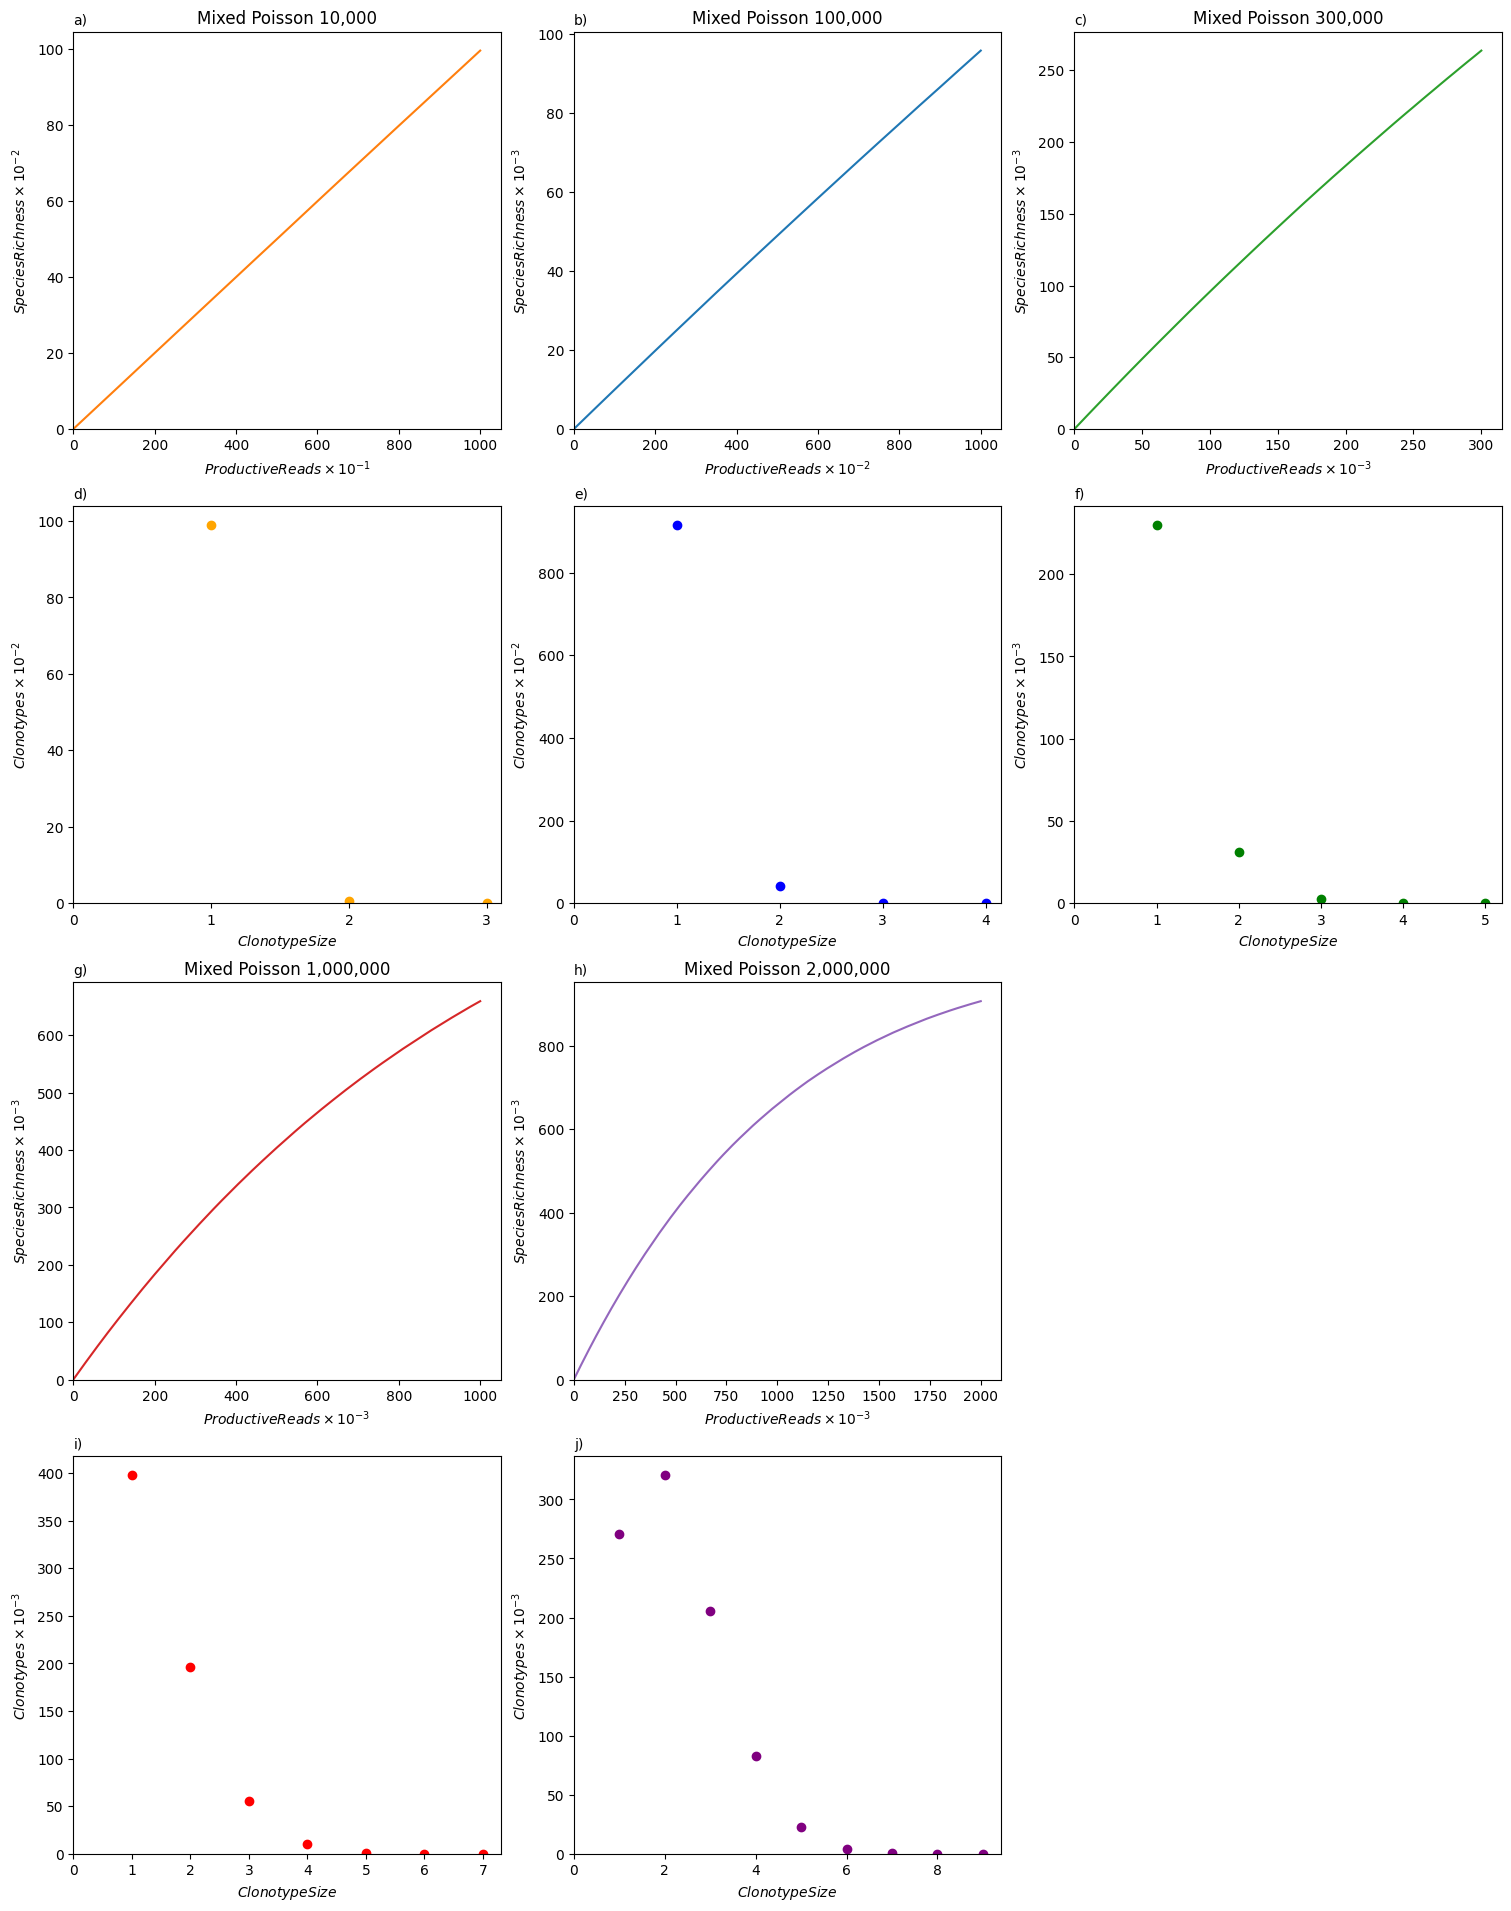

In [ ]:
fig, axs = plt.subplots(4, 3, figsize = (15, 19), constrained_layout=True) # sharex=True, sharey=True

# 10,000
x_m1_1 = list(range(1, 500*(len(mp2_s10_000)), 500))
x_m1_1 = [i + 500 for i in x_m1_1]
x_m1_1.insert(0, 0)
x_m1_1 = [i *10**-1 for i in x_m1_1]
y_m1_1 = list(mp2_s10_000[0]*10**-2)
y_m1_1.insert(0, 0)
axs[0, 0].plot(x_m1_1, y_m1_1, 'tab:orange')
axs[0, 0].set_title('Mixed Poisson 10,000')
axs[0, 0].set(xlabel=r'$Productive Reads \times 10^{-1}$', ylabel=r'$Species Richness \times 10^{-2}$')
axs[0, 0].set_xlim(0)
axs[0, 0].set_ylim(0)
axs[0, 0].set_title('a)', loc='left', fontsize='medium')
# 100,000
x_m1_2 = list(range(1, 5000*(len(mp2_s100_000)), 5000))
x_m1_2 = [i + 5000 for i in x_m1_2]
x_m1_2.insert(0, 0)
x_m1_2 = [i *10**-2 for i in x_m1_2]
y_m1_2 = list(mp2_s100_000[0]*10**-3)
y_m1_2.insert(0, 0)
axs[0, 1].plot(x_m1_2, y_m1_2, 'tab:blue')
axs[0, 1].set_title('Mixed Poisson 100,000')
axs[0, 1].set(xlabel=r'$Productive Reads \times 10^{-2}$', ylabel=r'$Species Richness \times 10^{-3}$')
axs[0, 1].set_xlim(0)
axs[0, 1].set_ylim(0)
axs[0, 1].set_title('b)', loc='left', fontsize='medium')
# 300,000
x_m1_3 = list(range(1, 5000*(len(mp2_s300_000)), 5000))
x_m1_3 = [i + 5000 for i in x_m1_3]
x_m1_3.insert(0, 0)
x_m1_3 = [i *10**-3 for i in x_m1_3]
y_m1_3 = list(mp2_s300_000[0]*10**-3)
y_m1_3.insert(0, 0)
axs[0, 2].plot(x_m1_3, y_m1_3, 'tab:green')
axs[0, 2].set_title('Mixed Poisson 300,000')
axs[0, 2].set(xlabel=r'$Productive Reads \times 10^{-3}$', ylabel=r'$Species Richness \times 10^{-3}$')
axs[0, 2].set_xlim(0)
axs[0, 2].set_ylim(0)
axs[0, 2].set_title('c)', loc='left', fontsize='medium')

# Row 2: Clonotype
axs[1, 0].scatter(x=mp2_clone_10_000['x'], y=mp2_clone_10_000['y']*10**-2, c='orange')
axs[1, 0].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-2}$', xticks=[0, 1, 2, 3])
axs[1, 0].set_xlim(0)
axs[1, 0].set_ylim(0)
axs[1, 0].set_title('d)', loc='left', fontsize='medium')
axs[1, 1].scatter(x=mp2_clone_100_000['x'], y=mp2_clone_100_000['y']*10**-2, c='blue')
axs[1, 1].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-2}$', xticks=[0, 1, 2, 3, 4])
axs[1, 1].set_xlim(0)
axs[1, 1].set_ylim(0)
axs[1, 1].set_title('e)', loc='left', fontsize='medium')
axs[1, 2].scatter(x=mp2_clone_300_000['x'], y=mp2_clone_300_000['y']*10**-3, c='green')
axs[1, 2].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-3}$')
axs[1, 2].set_xlim(0)
axs[1, 2].set_ylim(0)
axs[1, 2].set_title('f)', loc='left', fontsize='medium')

# Row 3: Rarefaction
# 1 Million
x_m1_4 = list(range(1, 5000*(len(mp2_s1_000_000)), 5000))
x_m1_4 = [i + 5000 for i in x_m1_4]
x_m1_4.insert(0, 0)
x_m1_4 = [i *10**-3 for i in x_m1_4]
y_m1_4 = list(mp2_s1_000_000[0]*10**-3)
y_m1_4.insert(0, 0)
axs[2, 0].plot(x_m1_4, y_m1_4, 'tab:red')
axs[2, 0].set_title('Mixed Poisson 1,000,000')
axs[2, 0].set(xlabel=r'$Productive Reads \times 10^{-3}$', ylabel=r'$Species Richness \times 10^{-3}$')
axs[2, 0].set_xlim(0)
axs[2, 0].set_ylim(0)
axs[2, 0].set_title('g)', loc='left', fontsize='medium')
# 2 Million
x_m1_5 = list(range(1, 5000*(len(mp2_s2_000_000)), 5000))
x_m1_5 = [i + 5000 for i in x_m1_5]
x_m1_5.insert(0, 0)
x_m1_5 = [i *10**-3 for i in x_m1_5]
y_m1_5 = list(mp2_s2_000_000[0]*10**-3)
y_m1_5.insert(0, 0)
axs[2, 1].plot(x_m1_5, y_m1_5, 'tab:purple')
axs[2, 1].set_title('Mixed Poisson 2,000,000')
axs[2, 1].set(xlabel=r'$Productive Reads \times 10^{-3}$', ylabel=r'$Species Richness \times 10^{-3}$')
axs[2, 1].set_xlim(0)
axs[2, 1].set_ylim(0)
axs[2, 1].set_title('h)', loc='left', fontsize='medium')

# Row 4: Clonotype
axs[3, 0].scatter(x=mp2_clone_1_000_000['x'], y=mp2_clone_1_000_000['y']*10**-3, c='red')
axs[3, 0].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-3}$')
axs[3, 0].set_xlim(0)
axs[3, 0].set_ylim(0)
axs[3, 0].set_title('i)', loc='left', fontsize='medium')
axs[3, 1].scatter(x=mp2_clone_2_000_000['x'], y=mp2_clone_2_000_000['y']*10**-3, c='purple')
axs[3, 1].set(xlabel=r'$Clonotype Size$', ylabel=r'$Clonotypes \times 10^{-3}$')
axs[3, 1].set_xlim(0)
axs[3, 1].set_ylim(0)
axs[3, 1].set_title('j)', loc='left', fontsize='medium')


fig.delaxes(axs[2, 2])
fig.delaxes(axs[3, 2])

plt.savefig('clone_mp2.png', dpi=300)

# Chao1 Estimator

## Sonia & TCRdb

In [ ]:
counts_tcr = np.repeat(clone_tcr['x'], clone_tcr['y'])
counts_sonia1 = np.repeat(clone_sonia1['x'], clone_sonia1['y'])
counts_sonia2 = np.repeat(clone_sonia2['x'], clone_sonia2['y'])

In [ ]:
print(len(counts_tcr))
print(len(counts_sonia1))
print(len(counts_sonia2))

142770
52152541
852972


In [ ]:
# TCRdb
chao1(counts_tcr, bias_corrected=True)

143281.3829787234

In [ ]:
# SONIA1
chao1(counts_sonia1, bias_corrected=True)

238028650.58724433

In [ ]:
# SONIA2
chao1(counts_sonia2, bias_corrected=True)

10491383.173755357

## Uniform Distribution 1

In [ ]:
clone_10_000.head()

,x,y
0,1,8792
1,2,564
2,3,24
3,4,2


In [ ]:
counts_10_000 = np.repeat(clone_10_000['x'], clone_10_000['y'])
counts_100_000 = np.repeat(clone_100_000['x'], clone_100_000['y'])
counts_1_000_000 = np.repeat(clone_1_000_000['x'], clone_1_000_000['y'])
counts_3_000_000 = np.repeat(clone_3_000_000['x'], clone_3_000_000['y'])

In [ ]:
print(len(counts_10_000))
print(len(counts_100_000))
print(len(counts_1_000_000))
print(len(counts_3_000_000))

9382
57295
96324
99540


In [ ]:
chao1(counts_10_000, bias_corrected=True)

77780.64778761062

In [ ]:
chao1(counts_100_000, bias_corrected=True)

84897.90572104593

In [ ]:
chao1(counts_1_000_000, bias_corrected=True)

98856.50019755037

In [ ]:
chao1(counts_3_000_000, bias_corrected=True)

100076.32305005821

## Mixed Poisson Distribution

In [ ]:
mp_counts_10_000 = np.repeat(mp_clone_10_000['x'], mp_clone_10_000['y'])
mp_counts_100_000 = np.repeat(mp_clone_100_000['x'], mp_clone_100_000['y'])
mp_counts_300_000 = np.repeat(mp_clone_300_000['x'], mp_clone_300_000['y'])

In [ ]:
print(len(mp_counts_10_000))
print(len(mp_counts_100_000))
print(len(mp_counts_300_000))

9564
65949
98289


In [ ]:
print(chao1(mp_counts_10_000, bias_corrected=True))
print(chao1(mp_counts_100_000, bias_corrected=True))
print(chao1(mp_counts_300_000, bias_corrected=True))

111204.80291970803
106069.79681781211
100517.185543131


## Uniform Distribution 2

In [ ]:
counts2_10_000 = np.repeat(clone2_10_000['x'], clone2_10_000['y'])
counts2_100_000 = np.repeat(clone2_100_000['x'], clone2_100_000['y'])
counts2_1_000_000 = np.repeat(clone2_1_000_000['x'], clone2_1_000_000['y'])
counts2_3_000_000 = np.repeat(clone2_3_000_000['x'], clone2_3_000_000['y'])
counts2_10_000_000 = np.repeat(clone2_10_000_000['x'], clone2_10_000_000['y'])
counts2_20_000_000 = np.repeat(clone2_20_000_000['x'], clone2_20_000_000['y'])
counts2_30_000_000 = np.repeat(clone2_30_000_000['x'], clone2_30_000_000['y'])
counts2_40_000_000 = np.repeat(clone2_40_000_000['x'], clone2_40_000_000['y'])

print(len(counts2_10_000))
print(len(counts2_100_000))
print(len(counts2_1_000_000))
print(len(counts2_3_000_000))
print(len(counts2_10_000_000))
print(len(counts2_20_000_000))
print(len(counts2_30_000_000))
print(len(counts2_40_000_000))

print(chao1(counts2_10_000, bias_corrected=True))
print(chao1(counts2_100_000, bias_corrected=True))
print(chao1(counts2_1_000_000, bias_corrected=True))
print(chao1(counts2_3_000_000, bias_corrected=True))
print(chao1(counts2_10_000_000, bias_corrected=True))
print(chao1(counts2_20_000_000, bias_corrected=True))
print(chao1(counts2_30_000_000, bias_corrected=True))
print(chao1(counts2_40_000_000, bias_corrected=True))

9927
93765
573485
845046
962767
987570
994971
998360
665950.3918918918
777983.7594891805
854566.636055504
932392.0171214453
987326.2721248101
998598.9407869108
1000798.2699493626
1001409.3459178124


## Mixed Poisson Distribution 2

In [ ]:
mp_counts2_10_000 = np.repeat(mp2_clone_10_000['x'], mp2_clone_10_000['y'])
mp_counts2_100_000 = np.repeat(mp2_clone_100_000['x'], mp2_clone_100_000['y'])
mp_counts2_300_000 = np.repeat(mp2_clone_300_000['x'], mp2_clone_300_000['y'])
mp_counts2_1_000_000 = np.repeat(mp2_clone_1_000_000['x'], mp2_clone_1_000_000['y'])
mp_counts2_2_000_000 = np.repeat(mp2_clone_2_000_000['x'], mp2_clone_2_000_000['y'])

print(len(mp_counts2_10_000))
print(len(mp_counts2_100_000))
print(len(mp_counts2_300_000))
print(len(mp_counts2_1_000_000))
print(len(mp_counts2_2_000_000))

print(chao1(mp_counts2_10_000, bias_corrected=True))
print(chao1(mp_counts2_100_000, bias_corrected=True))
print(chao1(mp_counts2_300_000, bias_corrected=True))
print(chao1(mp_counts2_1_000_000, bias_corrected=True))
print(chao1(mp_counts2_2_000_000, bias_corrected=True))


9951
95756
263668
659465
906533
1076030.4782608696
1134520.431930693
1115249.1298036692
1063016.7704240815
1021095.840227177


# ACE (Abundance-based Coverage Estimator) Values

https://github.com/filippob/Rare-OTUs-ACE

http://scikit-bio.org/docs/0.1.3/math.diversity.alpha.html

## Sonia & TCRdb

In [ ]:
ace(counts_tcr)

142918.2003235406

In [ ]:
ace(counts_sonia1)

276768368.1433126

In [ ]:
ace(counts_sonia2)

12304454.719442006

## Uniform Distribution

In [ ]:
ace(counts_10_000)

78149.29467816302

In [ ]:
ace(counts_100_000)

84850.15006074491

In [ ]:
ace(counts_1_000_000)

97834.41314591013

In [ ]:
ace(counts_3_000_000)

99915.31034969806

## Mixed Poisson Distribution

In [ ]:
print(ace(mp_counts_10_000))
print(ace(mp_counts_100_000))
print(ace(mp_counts_300_000))

111338.7660069849
109424.41387778129
101876.40791055709


## Uniform Distribution 2

In [ ]:
print(ace(counts2_10_000))
print(ace(counts2_100_000))
print(ace(counts2_1_000_000))
print(ace(counts2_3_000_000))
print(ace(counts2_10_000_000))
print(ace(counts2_20_000_000))
print(ace(counts2_30_000_000))
print(ace(counts2_40_000_000))


679931.5068493176
778939.255696763
853002.6217109904
920888.7359573845
977546.0196120563
994507.0178536557
998937.5665069917
1000697.7005350457


## Mixed Poisson Distribution 2

In [ ]:
print(ace(mp_counts2_10_000))
print(ace(mp_counts2_100_000))
print(ace(mp_counts2_300_000))
print(ace(mp_counts2_1_000_000))
print(ace(mp_counts2_2_000_000))


1095779.6404640344
1141991.6517590939
1130619.4791458219
1094669.4487187788
1048602.9739217942


# Rarefaction Plot

In [ ]:


axs[2, 1].plot(x_u1_6, y_u1_6, 'tab:brown')


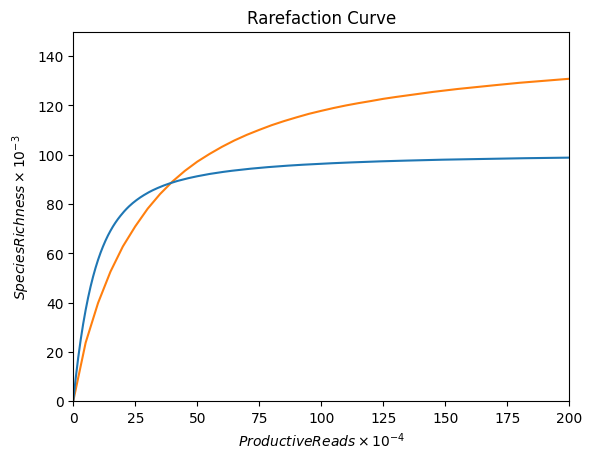

In [9]:
# tcr
x_tcr = list(range(1, 50000*(len(unique_tcr)), 50000))
x_tcr = [i + 50000 for i in x_tcr]
x_tcr.insert(0, 0)
x_tcr = [i *10**-4 for i in x_tcr]
y_tcr = list(unique_tcr[0]*10**-3)
y_tcr.insert(0, 0)
plt.plot(x_tcr, y_tcr, 'tab:orange')
# plt.plot(x_tcr, unique_tcr[0]*10**-3, 'tab:orange')
x_u1_6 = list(range(1, 5000*(len(unique2_s20_000_000)), 5000))
x_u1_6 = [i + 5000 for i in x_u1_6]
x_u1_6.insert(0, 0)
x_u1_6 = [i *10**-4 for i in x_u1_6]
y_u1_6 = list(unique2_s20_000_000[0]*10**-4)
y_u1_6.insert(0, 0)
plt.plot(x_u1_6, y_u1_6, 'tab:blue')
plt.xlim(left=0, right=200)
plt.ylim(bottom=0)
plt.title('Rarefaction Curve')
plt.xlabel(r'$Productive Reads \times 10^{-4}$')
plt.ylabel(r'$Species Richness \times 10^{-3}$')

plt.savefig('rarefaction.png', dpi=300)